In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
colmap = {1: 'r', 2: 'g', 3: 'b', 4: 'k'}

In [76]:
df = pd.read_csv(r'C:\Users\sarka\Desktop\Major Project\input\volatility.csv' , header=0)
df = df.drop(columns=['Code'])
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, n_init=25)
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=25, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [77]:
labels = kmeans.predict(df)
df['Cluster'] = labels
df.to_csv(r'C:\Users\sarka\Desktop\Major Project\input\volatility-clustered.csv')
centroids = kmeans.cluster_centers_
print(df)

     Volt  Growth  Cluster
0    0.97   35.03        0
1    1.44   19.11        2
2    1.03  -11.94        1
3    0.86    5.69        2
4    1.19   13.59        2
..    ...     ...      ...
496  1.16   33.76        0
497  0.85   10.29        2
498  0.80    9.83        2
499  1.23   56.34        0
500  0.99   29.64        2

[501 rows x 3 columns]


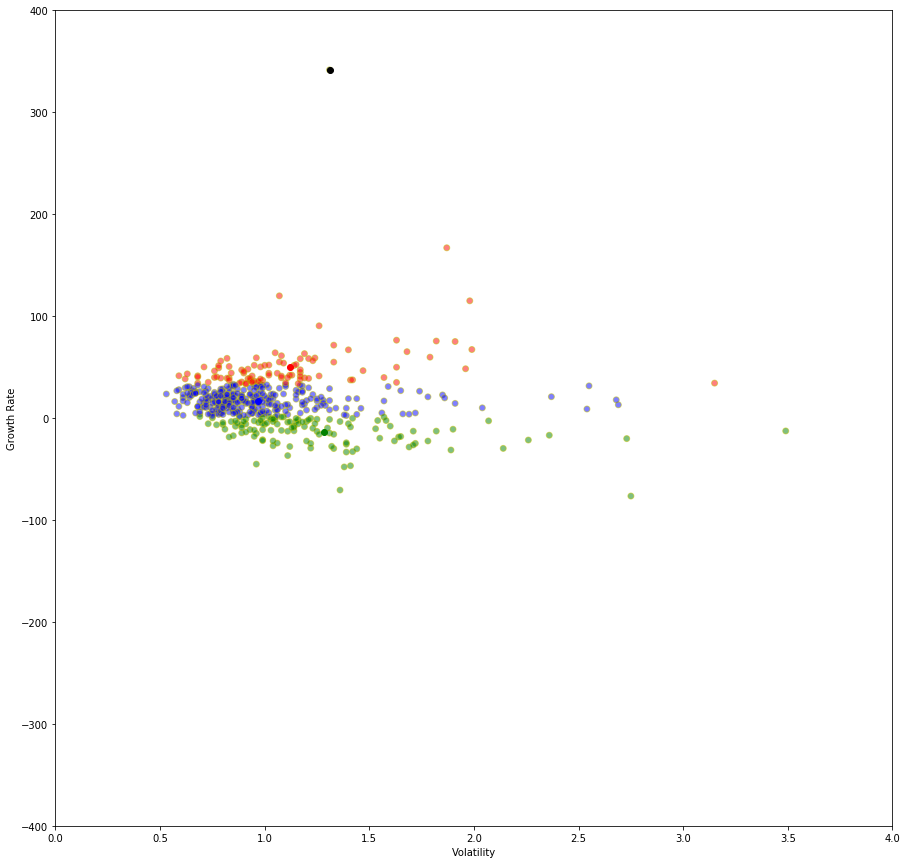

In [78]:
fig = plt.figure(figsize=(15, 15))

colors = map(lambda x: colmap[x+1], labels)
colors = list(colors)

plt.scatter(df['Volt'], df['Growth'], color=colors, alpha=0.5, edgecolor='y')
for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid, color=colmap[idx+1])
plt.ylabel('Growth Rate')
plt.xlabel('Volatility')
plt.xlim(0, 4)
plt.ylim(-400, 400)
plt.show()